In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings 
warnings.filterwarnings('ignore') 

In [7]:
data = pd.read_csv("data.csv", encoding="cp1252") 
data

C:\Users\SOMESH\AppData\Local\Temp\ipykernel_19296\1740817094.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data.csv", encoding="cp1252")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [9]:
# Cleaning up name changes
data.state = data.state.replace({'Uttaranchal':'Uttarakhand'}) 
data.state[data.location == "Jamshedpur"] = data.state[data.location == 'Jamshedpur'].replace({"Bihar":"Jharkhand"})

C:\Users\SOMESH\AppData\Local\Temp\ipykernel_19296\1362725717.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.state[data.location == "Jamshedpur"] = data.state[data.location == 'Jamshedpur'].replace({"Bihar":"Jharkhand"})
C:\Users\S

In [10]:
# Changing types to uniform format
types = {
    "Residential": "R", 
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO", 
    "Industrial Area": "I",
    "Industrial Areas": "I", 
    "Industrial": "I", 
    "Sensitive Area": "S", 
    "Sensitive Areas": "S", 
    "Sensitive": "S", 
    np.nan: "RRO"
}

data.type = data.type.replace(types) 
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [11]:
# defining columns of importance, which shall be used reguarly 
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

In [12]:
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
data[VALUE_COLS] = imputer.fit_transform(data[VALUE_COLS])

In [13]:
# checking to see if the dataset has any null values left over and the format 
print(data.isnull().sum())
data.tail()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                                0
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
dtype: int64


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN
435741,NaN,NaN,Tripura,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN


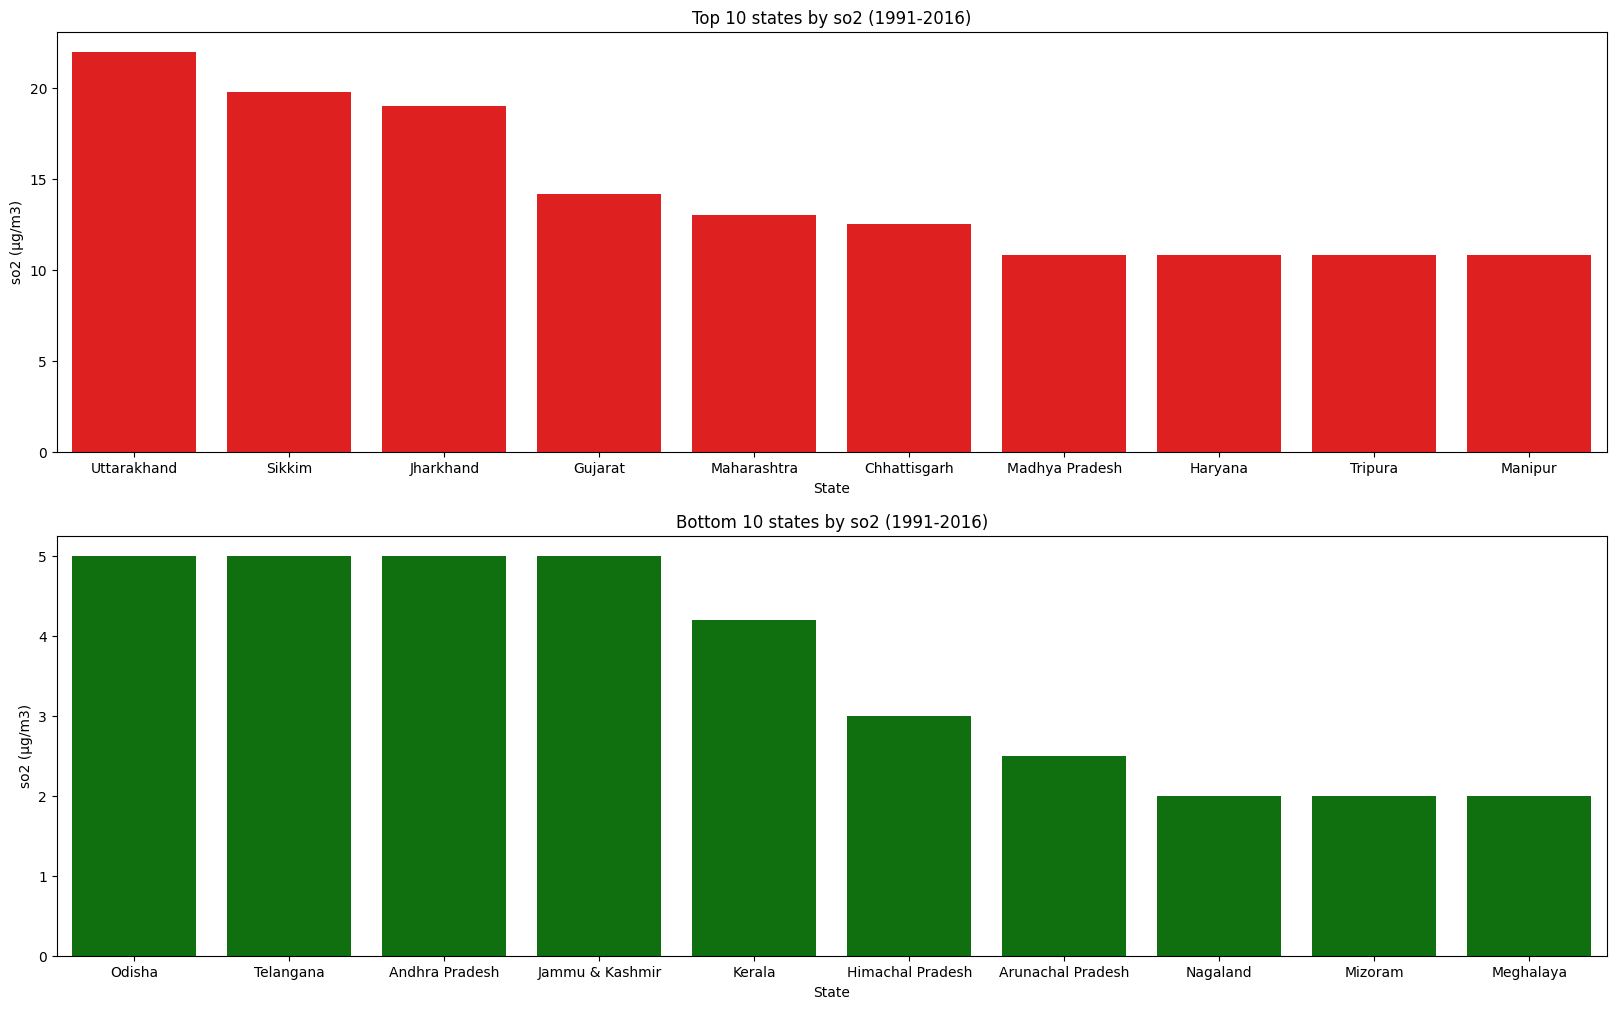

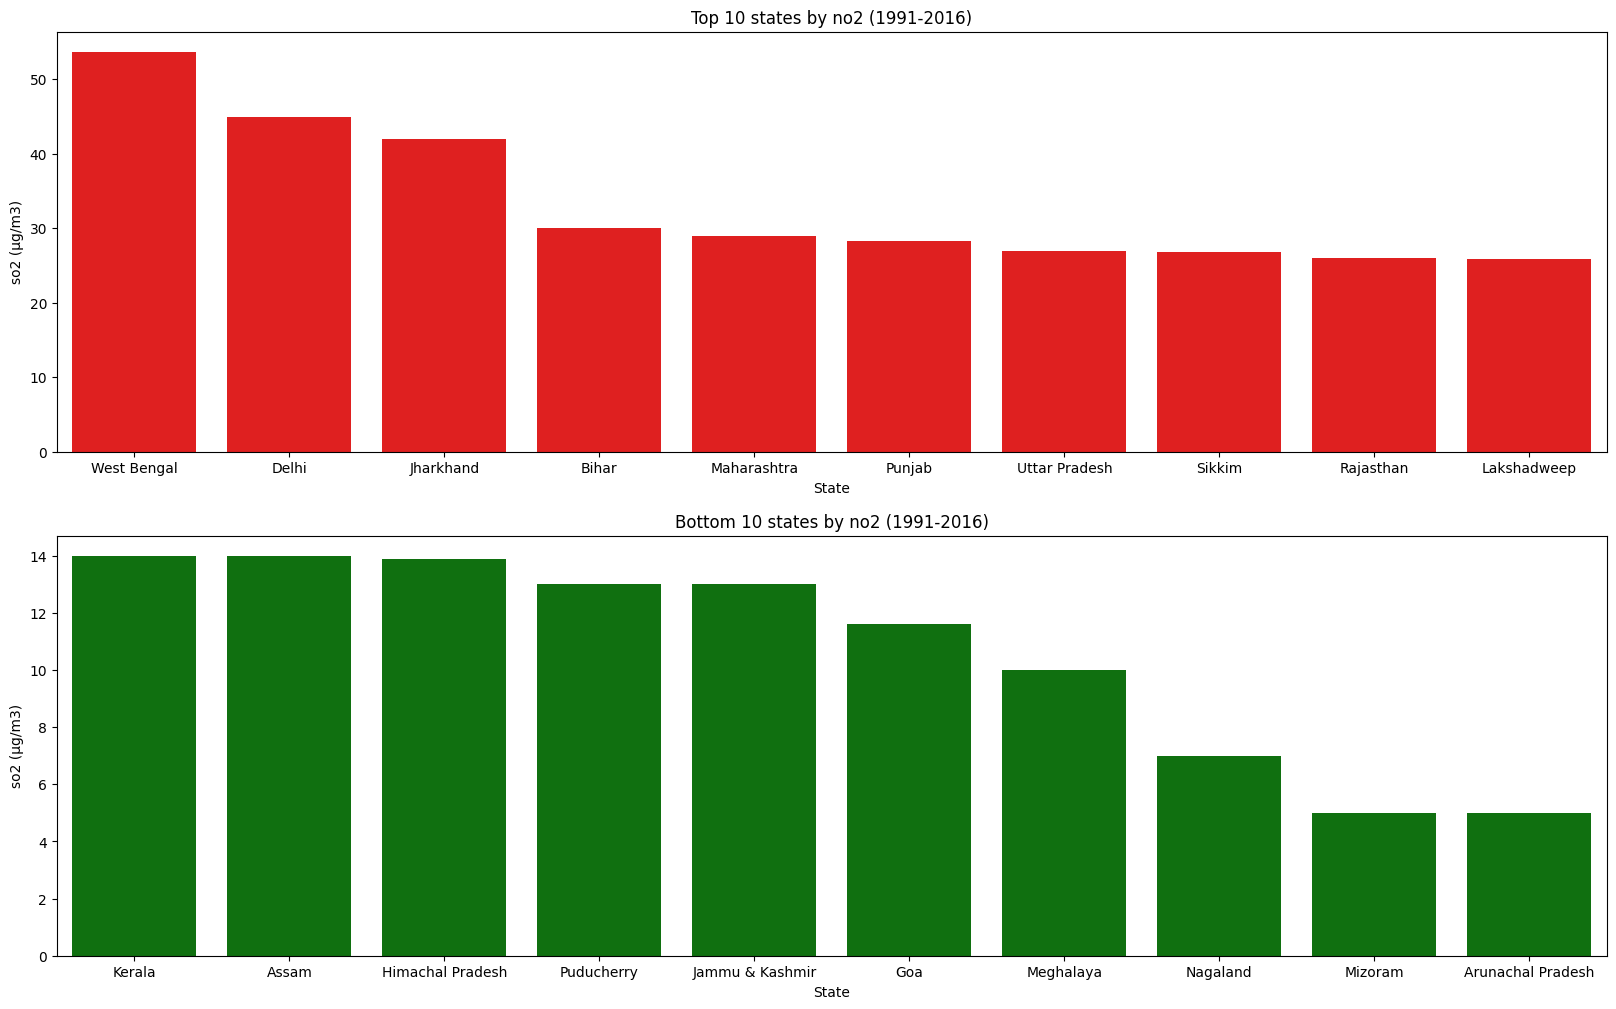

In [14]:
# Plotting highest and lowest ranking states
# defining a function to find and plot the top 10 and bottom 10 states for a given indicator (defaults to SO2) 
def top_and_bottom_10_states(indicator="so2"):
    fig, ax = plt.subplots(2,1, figsize=(20, 12))
    ind = data[[indicator, 'state']].groupby('state', as_index=False).median().sort_values(by=indicator,ascending=False)
    top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0], color='red') 
    top10.set_title("Top 10 states by {} (1991-2016)".format(indicator)) 
    top10.set_ylabel("so2 (µg/m3)")
    top10.set_xlabel("State")
    bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1], color='green') 
    bottom10.set_title("Bottom 10 states by {} (1991-2016)".format(indicator)) 
    bottom10.set_ylabel("so2 (µg/m3)")
    bottom10.set_xlabel("State") 

top_and_bottom_10_states("so2") 
top_and_bottom_10_states("no2")

In [15]:
# Plotting the highest ever recorded levels
# defining a function to find the highest ever recorded levels for a given indicator (defaults to SO2) by state 
# sidenote: mostly outliers
def highest_levels_recorded(indicator="so2"): 
    plt.figure(figsize=(20,10))
    ind = data[[indicator, 'location', 'state', 'date']].groupby('state', as_index=False).max() 
    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title("Highest ever {} levels recorded by state".format(indicator))
    plt.xticks(rotation=90) 
    
highest_levels_recorded("no2") 
highest_levels_recorded("rspm")

TypeError: agg function failed [how->max,dtype->object]

<Figure size 2000x1000 with 0 Axes>

In [16]:
# Plotting pollutant average by type
# defining a function to plot pollutant averages by type for a given indicator 
def type_avg(indicator=""):
    type_avg = data[VALUE_COLS + ['type', 'date']].groupby("type").mean() 
    if not indicator:
        t = type_avg[indicator].plot(kind='bar') 
        plt.xticks(rotation = 0)
        plt.title("Pollutant average by type for {}".format(indicator)) 
    else:
        t = type_avg.plot(kind='bar') 
        plt.xticks(rotation = 0) 
        plt.title("Pollutant average by type")

type_avg('so2')

TypeError: agg function failed [how->mean,dtype->object]

In [17]:
# Plotting pollutant averages by locations/state
# defining a function to plot pollutant averages for a given indicator (defaults to SO2) by locations in a given state 
def location_avgs(state, indicator="so2"):
    locs = data[VALUE_COLS + ['state', 'location', 'date']].groupby(['state', 'location']).mean() 
    state_avgs = locs.loc[state].reset_index()
    sns.barplot(x='location', y=indicator, data=state_avgs) 
    plt.title("Location-wise average for {} in {}".format(indicator, state)) 
    plt.xticks(rotation = 90)

location_avgs("Bihar", "no2")

TypeError: agg function failed [how->mean,dtype->object]